<a href="https://colab.research.google.com/github/fxmike/data-science-bootcamp/blob/main/06_uczenie_maszynowe/09_svm_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

In [7]:
digits = datasets.load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [8]:
images = digits.images
labels = digits.target
print('images shape ', images.shape)
print('labels shape ', labels.shape)

images shape  (1797, 8, 8)
labels shape  (1797,)


In [9]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

wyświetlenie kilku obrazów

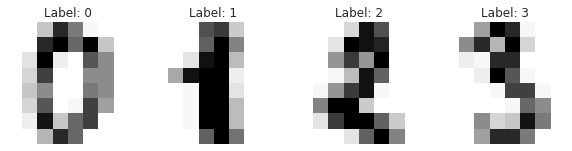

In [10]:
plt.figure(figsize=(10,10))
for index, (image,label) in enumerate(list(zip(images, labels))[:4]):
  plt.subplot(2,4,index + 1)
  plt.axis('off')
  plt.imshow(image, cmap='Greys')
  plt.title('Label: {}'.format(index, label))

przygotowanie danych do modelu

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train = X_train.reshape(X_train.shape[0], - 1)
X_test = X_test.reshape(X_test.shape[0], - 1)

print()
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (1347, 8, 8)
X_test shape:  (450, 8, 8)
y_train shape:  (1347,)
y_test shape:  (450,)

X_train shape:  (1347, 64)
X_test shape:  (450, 64)


In [13]:
X_train[0]

array([ 0.,  0., 10., 16., 16., 14.,  0.,  0.,  0.,  4., 16., 14., 10.,
        8.,  0.,  0.,  0., 13., 16.,  8.,  1.,  0.,  0.,  0.,  0., 12.,
       16., 16., 13.,  2.,  0.,  0.,  0.,  3.,  8.,  9., 16.,  5.,  0.,
        0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  5., 12.,
       15.,  2.,  0.,  0.,  0.,  0., 12., 15.,  5.,  0.,  0.,  0.])

In [14]:
y_train[0]

5

trenowanie modelu

In [15]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
y_pred = classifier.predict(X_test)
y_pred

array([4, 0, 5, 9, 4, 3, 1, 2, 3, 2, 6, 7, 9, 4, 8, 0, 4, 5, 2, 8, 1, 7,
       4, 5, 4, 6, 1, 7, 7, 0, 6, 6, 1, 4, 3, 5, 9, 3, 3, 0, 4, 0, 7, 3,
       1, 5, 8, 0, 3, 5, 4, 9, 3, 0, 6, 4, 6, 0, 1, 1, 6, 2, 6, 4, 0, 1,
       4, 4, 3, 6, 9, 4, 0, 8, 7, 4, 8, 1, 8, 8, 7, 3, 2, 7, 9, 9, 4, 8,
       5, 2, 3, 6, 9, 3, 0, 5, 3, 5, 8, 8, 2, 4, 3, 8, 0, 4, 6, 1, 9, 8,
       1, 8, 9, 5, 9, 0, 6, 3, 0, 1, 3, 6, 0, 6, 5, 8, 5, 5, 5, 0, 9, 7,
       3, 2, 0, 8, 9, 8, 1, 0, 7, 5, 0, 3, 0, 6, 9, 6, 3, 6, 1, 4, 6, 1,
       0, 3, 8, 6, 1, 4, 0, 7, 2, 5, 0, 6, 8, 5, 8, 6, 6, 5, 6, 5, 5, 0,
       8, 3, 4, 8, 3, 8, 4, 0, 0, 3, 7, 2, 0, 1, 0, 7, 9, 3, 9, 1, 1, 2,
       4, 1, 6, 1, 8, 1, 0, 1, 2, 2, 5, 6, 2, 7, 3, 2, 6, 3, 8, 0, 6, 5,
       3, 2, 9, 5, 9, 9, 6, 9, 5, 7, 2, 7, 9, 1, 5, 0, 6, 8, 3, 8, 8, 9,
       3, 2, 2, 0, 3, 9, 5, 6, 1, 2, 0, 6, 9, 4, 5, 1, 0, 3, 9, 9, 9, 7,
       7, 1, 2, 4, 7, 5, 3, 5, 1, 9, 0, 6, 3, 1, 6, 1, 7, 7, 0, 0, 1, 8,
       7, 7, 2, 3, 6, 2, 8, 2, 5, 5, 0, 5, 7, 8, 8,

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       0.97      1.00      0.99        39
           2       1.00      1.00      1.00        46
           3       0.98      1.00      0.99        49
           4       1.00      1.00      1.00        38
           5       0.98      0.96      0.97        47
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        35
           8       1.00      0.98      0.99        41
           9       0.96      0.96      0.96        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 43]])

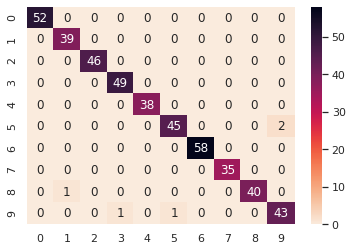

In [19]:
sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [20]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):

  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns=columns, index=index)

  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                    colorscale='ice', showscale=True, reversescale=True)
  fig.update_layout(width=700, height=500, title='confusion matrix', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

wyświetlenie błędnych predykcji

In [22]:
results = pd.DataFrame(data={'y_pred':y_pred, 'y_test':y_test})
results

,y_pred,y_test
0,4,4
1,0,0
2,5,5
3,9,9
4,4,4
...,...,...
445,2,2
446,1,1
447,9,9
448,6,6


In [23]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs

[51, 81, 192, 303, 321]

In [24]:
results.loc[errors_idxs,:]

,y_pred,y_test
51,9,5
81,3,9
192,9,5
303,5,9
321,1,8


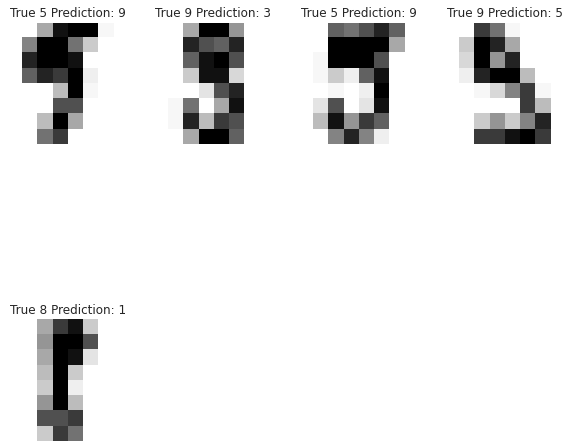

In [26]:
plt.figure(figsize=(10,10))

for idx, error_idx in enumerate(errors_idxs[:5]):
  image = X_test[error_idx].reshape(8,8)
  plt.subplot(2,4, idx + 1)
  plt.axis('off')
  plt.imshow(image, cmap='Greys')
  plt.title(f'True {results.loc[error_idx, "y_test"]} Prediction: {results.loc[error_idx, "y_pred"]}')

In [ ]:
#wczytanie danych, podzielenie danych na zbiory treingnowy i testowy, przetrenowanie modelu na danych treningowych i ocena modelu na danych testowych